## Age Analysis of Registered Voters in Durham County, North Carolina, United States of America

### Introduction
This project analyzed the distribution of age for registered voters in Durham County, North Carolina. The data used in this analysis was sourced from the North Carolina State Board of Elections. This data was accessed on September 16th, 2024. Please note that this is not a representative sample of eligible voters in Durham County, North Carolina, and the voter file is updated weekly on Saturday mornings. More information regarding North Carolina voter registration data can be found on the North Carolina State Board of Elections' website: https://www.ncsbe.gov/results-data/voter-registration-data

### Descriptive Statistics

In [18]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import zipfile

In [19]:
# Define Function to Read NC Voter Registration Data
def read_csv_ncvoterdata(voterdata):
    df = pd.read_csv(
        voterdata, sep="\t", header=0, encoding="unicode_escape", low_memory=False
    )
    return df


# Set File Path Variables for Durham County, NC data in directory
file_zip = "ncvoter32.zip"
file_txt = "ncvoter32.txt"

# Load Data
with zipfile.ZipFile(file_zip) as z:
    with z.open(file_txt) as f:
        df = read_csv_ncvoterdata(f)

# Display the first five rows of dataframe
df.head()

,county_id,county_desc,voter_reg_num,ncid,last_name,first_name,middle_name,name_suffix_lbl,status_cd,voter_status_desc,...,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,vtd_abbrv,vtd_desc
0,32,DURHAM,30456402,BL571211,A AWAD,AWATIF,ABDULELAH,NaN,D,DENIED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32,DURHAM,30416806,CA108173,AABID,MALCOLM,XAVIER,NaN,A,ACTIVE,...,NaN,NaN,NaN,NaN,DUR,DURHAM,16.0,PROSECUTORIAL DISTRICT 16,31,31
2,32,DURHAM,30432935,EH1369530,AAFREEN,SYEDA,RABEYA,NaN,A,ACTIVE,...,NaN,NaN,NaN,NaN,DUR,DURHAM,16.0,PROSECUTORIAL DISTRICT 16,02,02
3,32,DURHAM,30264624,BL383142,AAGAARD,AMBER,WOOD,NaN,A,ACTIVE,...,NaN,NaN,NaN,NaN,DUR,DURHAM,16.0,PROSECUTORIAL DISTRICT 16,01,01
4,32,DURHAM,30264632,BL383141,AAGAARD,BRIAN,PATRICK,NaN,A,ACTIVE,...,NaN,NaN,NaN,NaN,DUR,DURHAM,16.0,PROSECUTORIAL DISTRICT 16,01,01


In [12]:
# Define Functions to Calculate Mean, Median, and Standard Deviation of Age
def mean_age(df):
    # calculate mean of column with "age" in it
    age_column = [col for col in df.columns if "age" in col]
    if age_column:
        # Assuming there's only one age column in NC voter file data
        column_name = age_column[0]
        # Calculate the mean of the identified column
        result = df[column_name].mean()
        return result
    else:
        result = print("No column containing 'age' found.")
    return result


def median_age(df):
    # calculate median of column with "age" in it
    age_column = [col for col in df.columns if "age" in col]
    if age_column:
        # Assuming there's only one age column in NC voter file data
        column_name = age_column[0]
        # Calculate the mean of the identified column
        result = df[column_name].median()
        return result
    else:
        result = print("No column containing 'age' found.")
    return result


def std_age(df):
    # calculate standard deviation of column with "age" in it
    age_column = [col for col in df.columns if "age" in col]
    if age_column:
        # Assuming there's only one age column in NC voter file data
        column_name = age_column[0]
        # Calculate the mean of the identified column
        result = df[column_name].std()
        return result
    else:
        result = print("No column containing 'age' found.")
    return result


# Calculate Mean, Median, and Standard Deviation
summary = {
    "Statistic": [
        "Mean Age",
        "Median Age",
        "Standard Deviation of Age",
        "Count of Sample of Registered Voters",
    ],
    "Value (Rounded)": [
        round(mean_age(df), 2),
        round(median_age(df), 2),
        round(std_age(df), 2),
        round(len(df), 2),
    ],
}

# Create DataFrame
summarydf = pd.DataFrame(summary)
print(summarydf)

                              Statistic  Value (Rounded)
0                              Mean Age            46.98
1                            Median Age            42.00
2             Standard Deviation of Age            19.42
3  Count of Sample of Registered Voters        288837.00


### Data Processing

The raw dataset provided by the North Carolina State Board of Elections does not include an ordered categorical variable that delineates age groups. The first function "recode_age_groups" takes in a series of numbers and returns age groups represented as mutually exclusive ranges of ages. The second function "make_categorical_agecat" takes in a dataframe and converts a variable "Age Group" into an ordered categorical variable. 

In [13]:
def recode_age_groups(series):
    if 18 <= series <= 24:
        return "18-24 yrs"
    elif 25 <= series <= 29:
        return "25-29 yrs"
    elif 30 <= series <= 34:
        return "30-34 yrs"
    elif 35 <= series <= 39:
        return "35-39 yrs"
    elif 40 <= series <= 44:
        return "40-44 yrs"
    elif 45 <= series <= 49:
        return "45-49 yrs"
    elif 50 <= series <= 54:
        return "50-54 yrs"
    elif 55 <= series <= 59:
        return "55-59 yrs"
    elif 60 <= series <= 64:
        return "60-64 yrs"
    elif 65 <= series:
        return "65+ yrs"


def make_categorical_agecat(df):
    df["Age Group"] = pd.Categorical(
        df["Age Group"],
        categories=[
            "18-24 yrs",
            "25-29 yrs",
            "30-34 yrs",
            "35-39 yrs",
            "40-44 yrs",
            "45-49 yrs",
            "50-54 yrs",
            "55-59 yrs",
            "60-64 yrs",
            "65+ yrs",
        ],
        ordered=True,
    )
    return df

### Data Visualization

To visualize the distribution of age among registered voters in Durham County, North Carolina, I used a histogram created with the matplotlib Python package. 

In [14]:
def generate_histogram_age(df, plot_name):
    age_column = [col for col in df.columns if "age" in col]
    plt.figure(figsize=(10, 6))
    bins = 6
    plt.hist(df[age_column], color="orange", bins=bins, edgecolor="black")
    plt.title("Age Distribution for Registered Voters in Durham County, NC")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.gca().yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, _: f"{int(x):,}")
    )
    x_ticks = np.arange(0, 110, 10)
    plt.xticks(x_ticks)
    subfolder = "Output Images"
    file_path = os.path.join(subfolder, plot_name)
    plt.savefig(file_path)


def generate_age_gender_pyramid(df, plot_name):
    # Prepare data for plotting
    df = pd.DataFrame(df)
    age_gender_counts = (
        df.groupby(["Age Group", "gender_code"], observed=False)
        .size()
        .unstack(fill_value=0)
    )
    age_groups = age_gender_counts.index
    males = age_gender_counts["M"]
    females = age_gender_counts["F"]
    print(age_gender_counts)
    # Convert males to negative values for plotting
    males_negative = -males

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot the population pyramid
    ax.barh(
        age_groups,
        males_negative,
        color="cornflowerblue",
        label="Male",
        edgecolor="black",
    )
    ax.barh(age_groups, females, color="salmon", label="Female", edgecolor="black")

    # Set labels and title
    ax.set_xlabel("Number of Observations")
    ax.set_ylabel("Age Groups")
    ax.set_title("Registered Voters of Durham County, NC by Gender and Age Group")
    ax.legend()

    # Add grid for better readability
    ax.grid(True)
    subfolder = "Output Images"
    file_path = os.path.join(subfolder, plot_name)
    plt.savefig(file_path)

gender_code      F      M     U
Age Group                      
18-24 yrs    11753   9734  6018
25-29 yrs    16320  12216  6039
30-34 yrs    17805  14125  5221
35-39 yrs    15193  12721  3685
40-44 yrs    11346   9639  2381
45-49 yrs     9127   7652  1726
50-54 yrs     8667   7390  1520
55-59 yrs     8404   7065  1316
60-64 yrs     9047   7498  1296
65+ yrs      34735  26378  2820


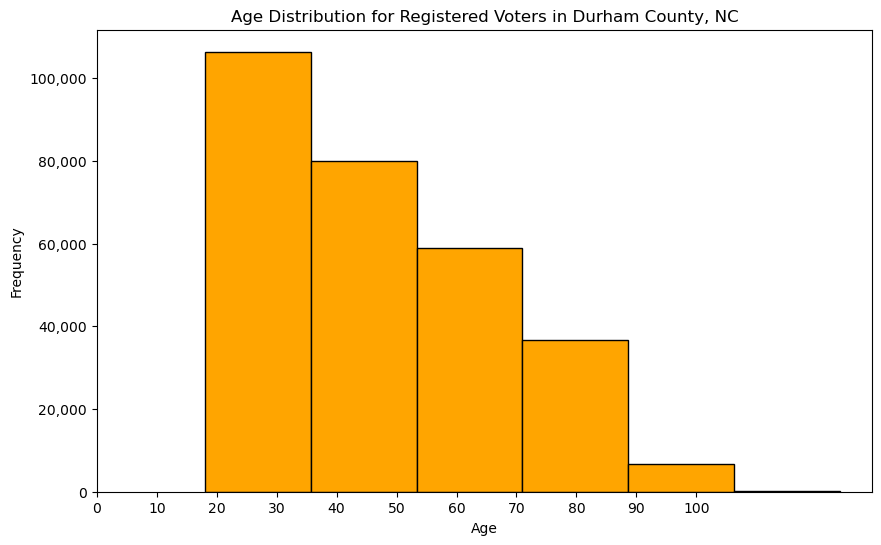

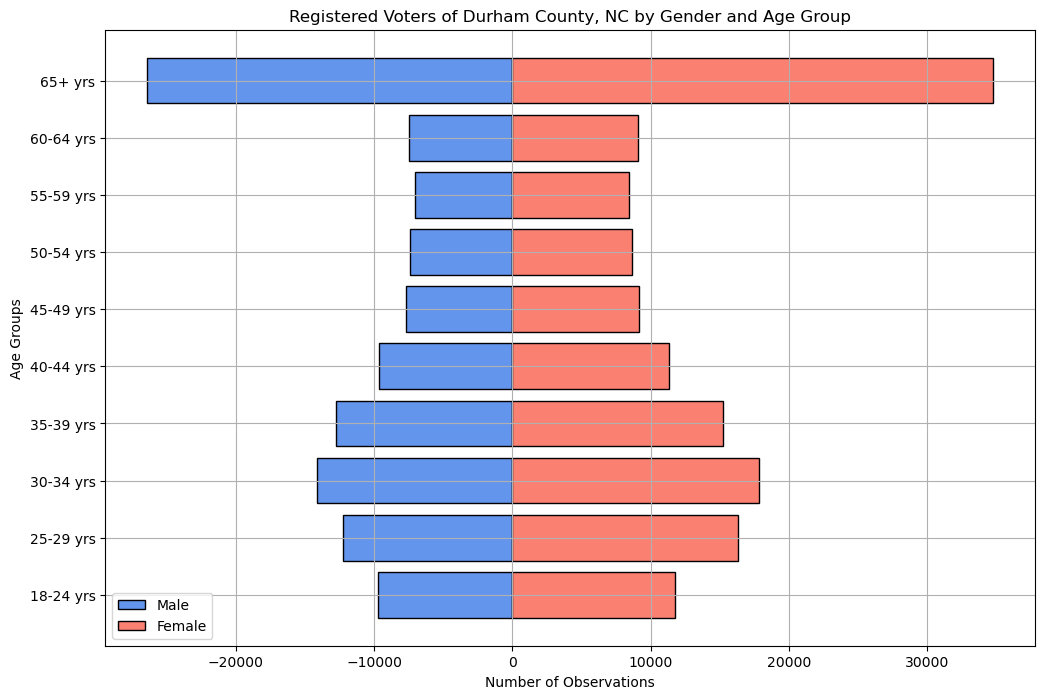

In [15]:
{
    "tags": [
        "hide-input",
    ]
}

df["Age Group"] = df["age_at_year_end"].apply(recode_age_groups)
make_categorical_agecat(df)
# generate histogram of age distribution
generate_histogram_age(df, "age_histogram")
# generate population pyramid of age and gender
generate_age_gender_pyramid(df, "age_gender_pyramid")

### Conclusion
 
Further analysis of voter registration data from the North Carolina State Board of Elections (NCSBE) could be supplemented by building in a function to scrape the zipped files present on the website and download the stored .txt files for analysis. The NCSBE updates the voter registration records weekly on Saturday mornings. Another automation could be built to download, analyze, and visualize these records weekly after they are updated. 


